# LAB 8 - Week 11

This lab will strengthen your ability to translate theoretical knowledge into a practical application, where you'll need to select, implement, and optimize various machine learning approaches to solve business problems. In this lab you will be using carefully selected datasets that mirror actual retail data structures. Using the complete machine learning workflow—from exploratory data analysis and preprocessing to model implementation, evaluation, and result interpretation. 

Scenario

As a junior data scientist at DataVine Analytics, you've been assigned to work with a boutique consulting group that specializes in diverse industry applications of machine learning. Your team serves clients across several sectors, and you've been tasked with developing prototype machine learning solutions using standardized datasets that mirror real-world problems.

Your supervisor has outlined three specific client projects that will test your ability to implement classification, recommendation, and clustering techniques while applying dimensionality reduction and hyper-parameter tuning:

# Agricultural Feed Recommendation Engine

An agricultural supply company wants to recommend similar feed types to farmers based on performance data.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Goal

The objective is to develop a recommendation system that assists an agricultural supply company in identifying and suggesting similar feed types based on their performance profiles. Using the chickwts dataset as a proxy—where each row represents a distinct feed product and each column captures key nutritional and performance-related attributes—the system will analyze and compare these profiles to uncover feeds with similar characteristics. This will enable the company to recommend reliable alternatives, ensure continuity during supply disruptions, and support farmers in making informed, performance-driven purchasing decisions.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Target Variable

Each row corresponds to a unique feed product, and the column feed_name identifies the product name. The dataset includes 15 numerical features that describe the performance profile of each feed — including weight outcomes and related nutritional or physical characteristics.

The primary variable of interest is this multidimensional performance profile, which serves as the basis for comparing feeds. Since this is not a supervised learning task, there is no single "target" variable to predict. Instead, the objective is to analyze feature patterns to determine which feed products are most similar in terms of performance.

By treating feed_name as the item to be recommended and using the numerical features as defining characteristics, we can apply PCA for dimensionality reduction and compute similarity scores (e.g., cosine similarity) to build a feed-to-feed recommendation system. This directly supports the business objective of helping farmers identify high-performing alternatives and make data-driven decisions.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Strategic Advantages

Inventory Flexibility: By identifying feeds with similar nutritional and performance profiles, the system enables effective substitutions when certain products are out of stock or prices fluctuate—minimizing supply disruptions for farmers.

Personalized Recommendations: Farmers receive tailored suggestions grounded in actual weight gain and performance data, allowing them to select feed options aligned with their production goals and constraints.

Evidence-Based Marketing: The supplier can promote underutilized or newly introduced feed types by demonstrating comparable effectiveness through objective performance data—enhancing customer confidence and adoption.

Operational Efficiency: Once deployed, the system can scale across thousands of transactions, automating feed comparisons and reducing reliance on manual analysis or expert judgment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

## 1.- Load and prepare Datasets

### Inspect the data for missing values and handle inconsistencies.

In [2]:
df_chickwts = pd.read_csv('chickwts_data.csv')

In [3]:
df_chickwts.head()

,feed_name,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
0,FirstPeck,19.5,3.2,2.4,0.82,0.78,10.8,4.5,2921,0.96,0.43,3.5,0.57,1.71,295,16.285714
1,ChickStart Plus,18.2,3.8,3.9,3.02,0.68,9.3,6.9,2865,0.99,0.37,3.4,0.70,1.67,302,20.588235
2,EarlyGrow Formula,19.3,4.6,3.2,1.20,0.69,10.2,5.8,2950,1.05,0.38,3.3,0.69,1.65,331,20.909091
3,HatchMate Premier,20.2,3.7,3.8,3.16,0.63,11.4,5.7,2866,1.11,0.38,3.2,0.74,1.71,292,23.125000
4,PeepNourish,19.2,3.9,4.2,3.06,0.61,9.3,5.9,2860,0.91,0.34,2.9,0.64,1.67,309,22.068966


In [4]:
df_chickwts.shape

(100, 16)

In [5]:
df_chickwts.count()

feed_name              100
proteinContent         100
fatContent             100
fiberContent           100
calciumContent         100
phosphorusContent      100
moistureContent        100
ashContent             100
metabolizableEnergy    100
lysineContent          100
methionineContent      100
particleSize           100
density                100
price                  100
shelfLife              100
weight                 100
dtype: int64

In [6]:
# Unique Vallues in feed = 100
df_chickwts["feed_name"].unique()

array(['FirstPeck', 'ChickStart Plus', 'EarlyGrow Formula',
       'HatchMate Premier', 'PeepNourish', 'NestStart Gold',
       'FledglingBlend', 'ChickBoost Complete', 'HatchlingEssentials',
       'FirstFeather Nutrition', 'StartRight Formula', 'EggToChick Plus',
       'BabyBirdBlend', 'ChickLaunch Pro', 'HatchSuccess Formula',
       'PeepStart Max', 'PulletFirst Complete', 'GrowStrong Advanced',
       'FeatherUp Complete', 'PulletPower Premium', 'MidGrow Formula',
       'JuvenileBlend Plus', 'GrowthMax Complete', 'TeenChick Formula',
       'DevelopPro Advanced', 'MidStageNutrition', 'RapidGrow Complete',
       'FeatherFill Premium', 'PulletDevelop Formula', 'JuniorLayer Prep',
       'MatureBlend Complete', 'GrowthFinish Advanced',
       'EggMaster Premium', 'LayMore Gold', 'ShellStrength Pro',
       'LayerLuxe Complete', 'EggBoost Supreme', 'NestResult Formula',
       'PeakLay Advanced', 'ShellMax Enhanced', 'EggcellenceBlend',
       'LayerProducer Plus', 'ClutchMaster Fo

In [7]:
# Unique Vallues in feed = 100, so each row is one different feed
df_chickwts["feed_name"].nunique()

100

In [8]:
df_chickwts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feed_name            100 non-null    object 
 1   proteinContent       100 non-null    float64
 2   fatContent           100 non-null    float64
 3   fiberContent         100 non-null    float64
 4   calciumContent       100 non-null    float64
 5   phosphorusContent    100 non-null    float64
 6   moistureContent      100 non-null    float64
 7   ashContent           100 non-null    float64
 8   metabolizableEnergy  100 non-null    int64  
 9   lysineContent        100 non-null    float64
 10  methionineContent    100 non-null    float64
 11  particleSize         100 non-null    float64
 12  density              100 non-null    float64
 13  price                100 non-null    float64
 14  shelfLife            100 non-null    int64  
 15  weight               100 non-null    floa

In [9]:
df_chickwts.describe()

,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.874000,3.990000,3.594000,1.668800,0.647800,10.418000,5.625000,2911.280000,0.942700,0.378500,2.529000,0.649500,1.654600,313.270000,27.147503
std,2.099332,0.707607,0.694832,1.177822,0.090716,0.854268,0.831498,102.461333,0.121172,0.054018,0.580716,0.055421,0.069201,12.668146,7.082035
min,15.000000,2.300000,2.300000,0.670000,0.400000,9.000000,4.100000,2711.000000,0.690000,0.260000,1.500000,0.550000,1.510000,290.000000,16.285714
25%,17.300000,3.500000,3.100000,0.855000,0.580000,9.800000,4.900000,2851.500000,0.860000,0.340000,2.000000,0.610000,1.610000,303.000000,22.000000
50%,19.050000,3.950000,3.600000,0.995000,0.645000,10.300000,5.650000,2897.500000,0.930000,0.380000,2.600000,0.650000,1.650000,313.500000,24.533333
75%,20.500000,4.500000,4.100000,3.037500,0.712500,11.200000,6.325000,2973.250000,1.022500,0.420000,3.000000,0.692500,1.690000,323.000000,31.013158
max,23.400000,5.700000,5.000000,3.950000,0.840000,11.900000,7.000000,3165.000000,1.240000,0.500000,3.500000,0.750000,1.830000,337.000000,46.250000


In [10]:
# There are no nulls
df_chickwts.isnull().sum()

feed_name              0
proteinContent         0
fatContent             0
fiberContent           0
calciumContent         0
phosphorusContent      0
moistureContent        0
ashContent             0
metabolizableEnergy    0
lysineContent          0
methionineContent      0
particleSize           0
density                0
price                  0
shelfLife              0
weight                 0
dtype: int64

In [11]:
# Check duplicates / No duplicates
df_chickwts[df_chickwts.duplicated()].shape[0]

0

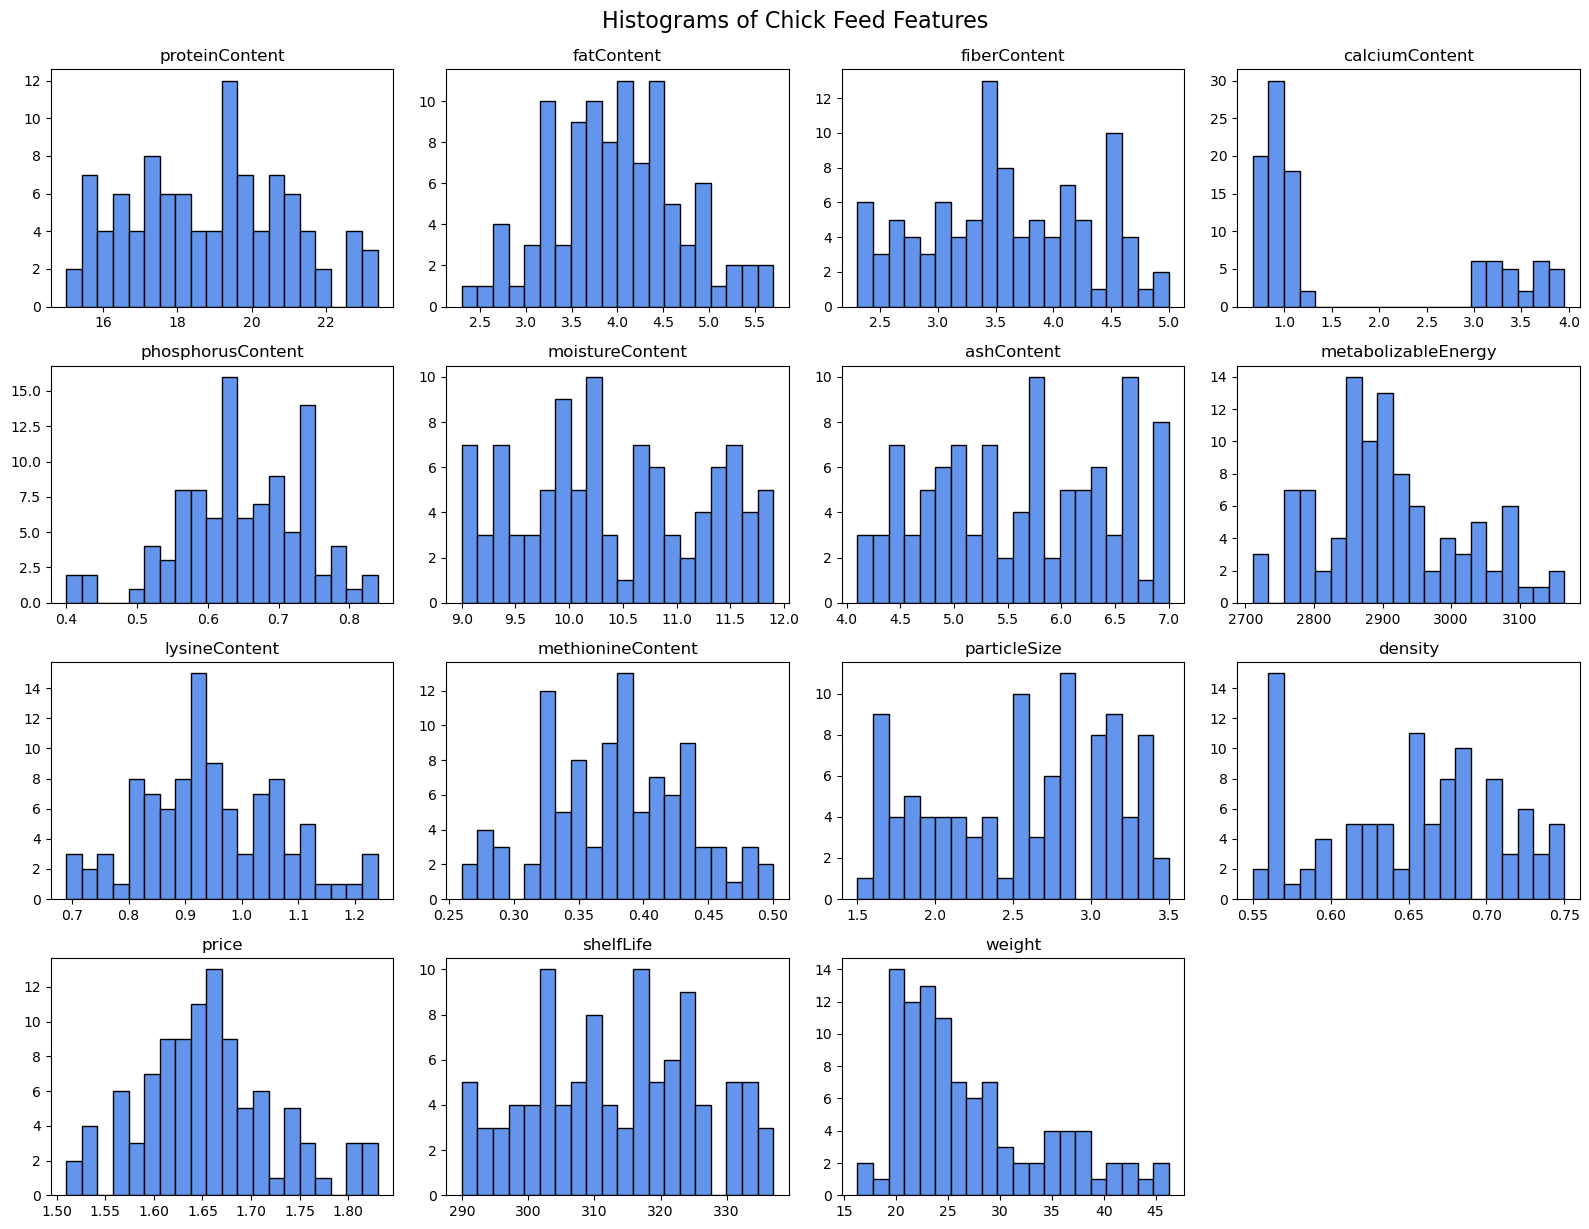

In [12]:
# Visual inspection
# Histograms to detect outliers

# Drop the categorical 'feed_name' column
numerical_features = df_chickwts.drop(columns=["feed_name"])

num_features = numerical_features.shape[1]
n_cols = 4
n_rows = (num_features + n_cols - 1) // n_cols
plt.figure(figsize=(16, n_rows * 3))

# Plot histogram for each numerical feature
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_chickwts[col], bins=20, color='cornflowerblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Histograms of Chick Feed Features", fontsize=16, y=1.02)
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Histogram observations:

Skewed Distributions: Key variables like metabolizableEnergy, weight, and price show right-skewed distributions, indicating a concentration of values at the lower end with a long tail of higher values.

Multimodality: Features such as fatContent, fiberContent, and ashContent show signs of multimodal distributions, possibly reflecting distinct formulation types across different feed brands.

Wide Variability: Attributes like calciumContent, density, and methionineContent exhibit wide ranges, suggesting considerable formulation diversity.

Outliers Likely: Sharp peaks or sparse tails (e.g., in moistureContent and shelfLife) hint at potential outliers or rare formulations. However, each row is a different feed, so the outliers migh be real data

These observations justify standardization and PCA to reduce noise and capture meaningful variance before similarity modeling.

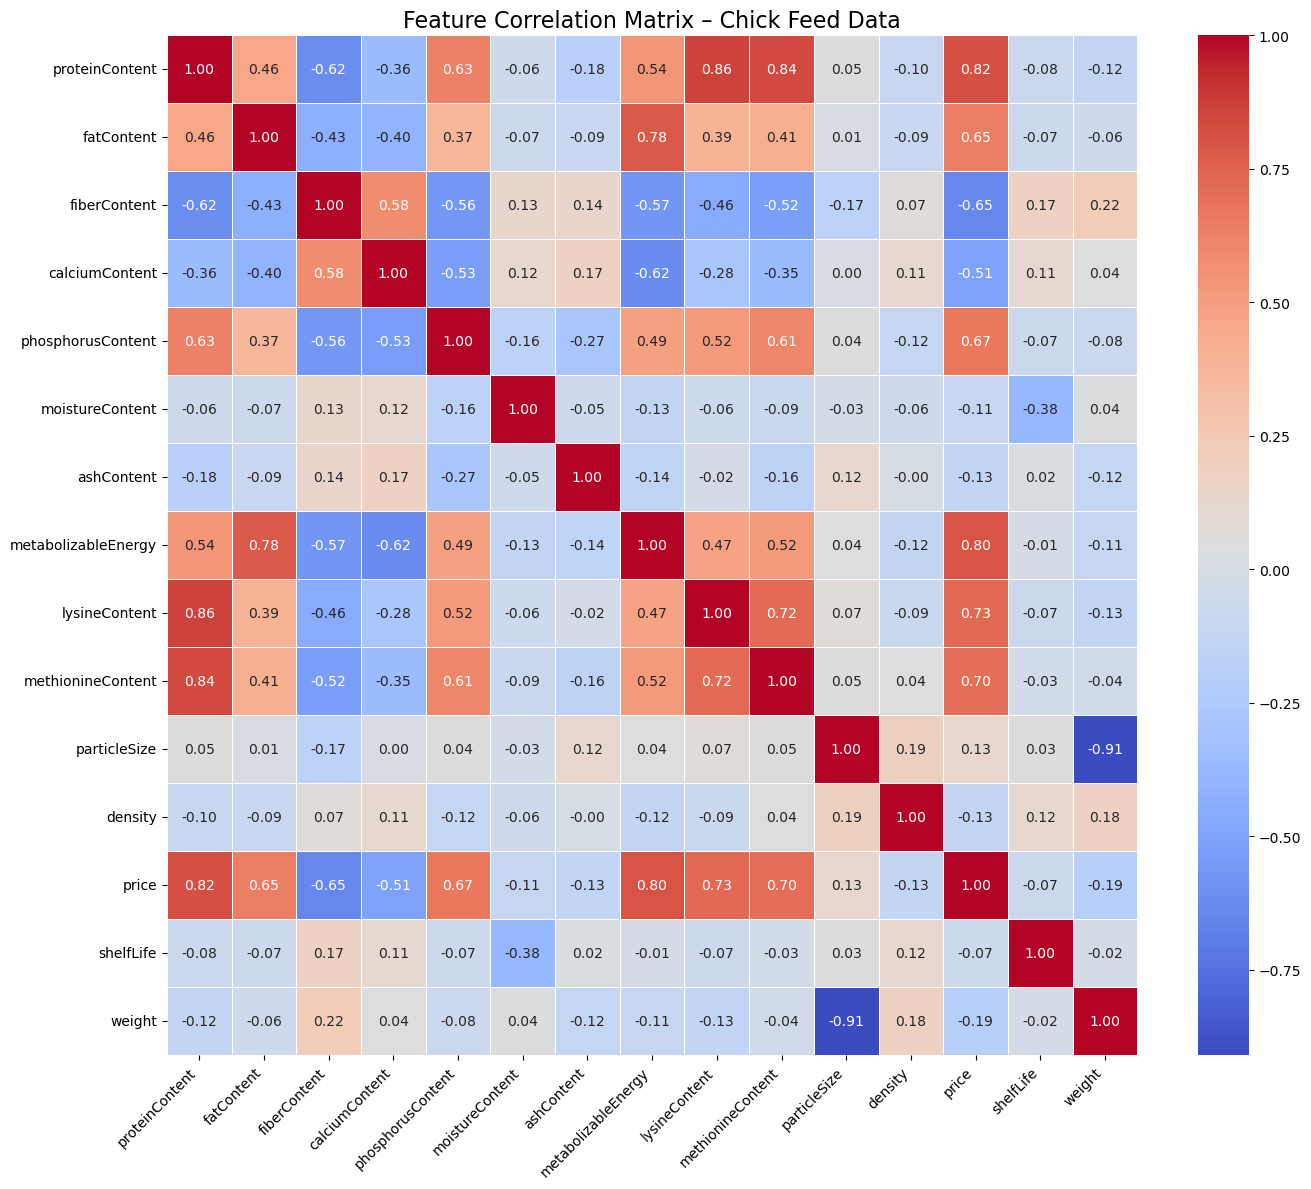

In [13]:
# Heatmap for correlation of the 15 variables

# Drop non-numerical column
features = df_chickwts.drop(columns=["feed_name"])

# Compute correlation matrix
correlation_matrix = features.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix – Chick Feed Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Heatmap observations:

The correlation heatmap reveals several meaningful relationships among nutritional features. Notably, protein content shows strong positive correlations with both lysine (r = 0.86) and methionine (r = 0.84), which is consistent with the nutritional role of amino acids as components of high-protein feeds. Similarly, fat content is strongly correlated with metabolizable energy (r = 0.78), reflecting the fact that fats are calorie-dense and contribute significantly to the energy profile of the feed. These clusters of highly correlated features suggest potential redundancy, making them suitable candidates for dimensionality reduction using techniques like Principal Component Analysis (PCA).

Another important finding is that price is positively correlated with protein (r = 0.82) and energy (r = 0.80) content, implying that nutrient-rich feeds tend to be more expensive. This correlation could be valuable in understanding the trade-offs between feed cost and performance, and may guide cost-effective recommendations.

On the other hand, particle size exhibits a strong negative correlation with chick weight gain (r = -0.91). This suggests that feeds with smaller particle sizes are generally associated with better performance in terms of weight gain. Such a relationship could inform future formulation strategies or feed selection guidance.

Several features, such as moisture content and ash content, display weak correlations with both nutritional attributes and weight, indicating that they may play a less significant role in driving performance outcomes.

Overall, the heatmap supports the rationale for applying PCA, as it highlights feature clusters with overlapping information. This redundancy, along with strong relationships between nutritional content and outcomes, confirms that PCA and similarity-based modeling are appropriate for building a feed recommendation system.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
**Model Chosen: PCA + Cosine Similarity Recommendation Engine**

Following the exploratory data analysis (EDA), we observed that the chick feed dataset contains several highly correlated features, such as protein, lysine, methionine, and energy content. These correlations indicate the presence of multicollinearity and redundancy, making Principal Component Analysis (PCA) an appropriate dimensionality reduction technique to retain key variation while simplifying the feature space.

Unlike a traditional supervised classification task, this project aims to recommend similar feed types based on nutritional and performance profiles—not predict a categorical target. Therefore, a content-based recommendation model is the best choice. Specifically, we’ll use PCA to transform the feature space and then compute cosine similarity between the resulting vectors.

This approach works particularly well for our use case because each feed is represented as a multi-dimensional point, capturing its profile and cosine similarity quantifies how "directionally" similar two feeds are, regardless of magnitude (ideal for standardized features).

PCA reduces noise and highlights the most important sources of variation across feeds.

This combination is intuitive, scalable, and aligns with the business goal: helping farmers discover alternative feed options based on real-world performance characteristics, even when direct substitutes aren’t obvious from raw values alone.

### Standardize numerical features to improve model performance
### Standardize the weight feature for uniform scaling.

In [14]:
# Identify numerical features (excluding the feed_name column)
numerical_cols = df_chickwts.select_dtypes(include='number').columns
features = df_chickwts[numerical_cols]

In [15]:
scaler = StandardScaler()

In [16]:
# Fit and transform the numerical features
X_std = scaler.fit_transform(features)

In [17]:
X_std.shape

(100, 15)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Summarize the Dataset to Confirm Its Structure**

The df_chickwts dataset was successfully loaded and evaluated for readiness in building a feed recommendation system. It contains 100 observations and 16 columns — 15 numerical features that describe various performance-related metrics for each feed product, and one categorical column (feed_name) identifying the feed type. Each row represents a unique feed product rather than individual chick records.

Initial inspection showed no missing values or duplicate rows. Histograms of the numerical features confirmed natural variability, with most variables following reasonably symmetric distributions. A correlation heatmap revealed moderate-to-strong linear relationships among certain features, supporting the use of dimensionality reduction.

All numerical features were standardized using StandardScaler to ensure equal contribution to similarity-based comparisons. This preprocessing step ensures that feeds are compared based on normalized performance profiles, laying the foundation for PCA transformation and feed-to-feed similarity analysis. The dataset is now clean, properly formatted, and ready for modeling.

## Build a Recommendation System Using the Chickwts Datasets

### Use PCA and cosine similarity to suggest similar feeds.

In [18]:
# Apply PCA to reduce dimensionality while retaining 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_std)

In [19]:
# cosine similarity matrix
cosine_sim_matrix = cosine_similarity(X_pca)
cosine_dist_matrix = 1 - cosine_sim_matrix

In [20]:
# Compute cosine similarity matrix
# Function to find the most similar feed types based on a distance matrix
# Top 5 most similar feeds 
def find_similar_feeds(feed_id, distance_matrix, feed_names, n=5):
    """
    Find the n most similar feeds to the feed at the given index.

    Parameters:
    feed_id: Integer from 1 to len(feed_names), identifying the row of the target feed
    distance_matrix: Matrix of distances between feed products (e.g., cosine distance)
    feed_names: List or Series of feed names corresponding to matrix rows
    n: Number of similar feeds to return

    Returns:
    List of feed names that are most similar to the specified feed
    """
    feed_idx = feed_id - 1  # Convert to zero-based index
    distances = distance_matrix[feed_idx]

    # Sort indices by distance (ascending), exclude the feed itself
    most_similar_idx = np.argsort(distances)
    most_similar_idx = most_similar_idx[most_similar_idx != feed_idx][:n]

    # Return the names of the similar feeds
    return feed_names.iloc[most_similar_idx].tolist()

In [21]:
# Example for ID = 10 Top 5 products similar to it
similar_feeds_cosine = find_similar_feeds(10, cosine_dist_matrix, df_chickwts['feed_name'])
similar_feeds_cosine

['ChickLaunch Pro',
 'HatchlingEssentials',
 'FertileEgg Premium',
 'MarketPrep Formula',
 'RapidGrow Complete']

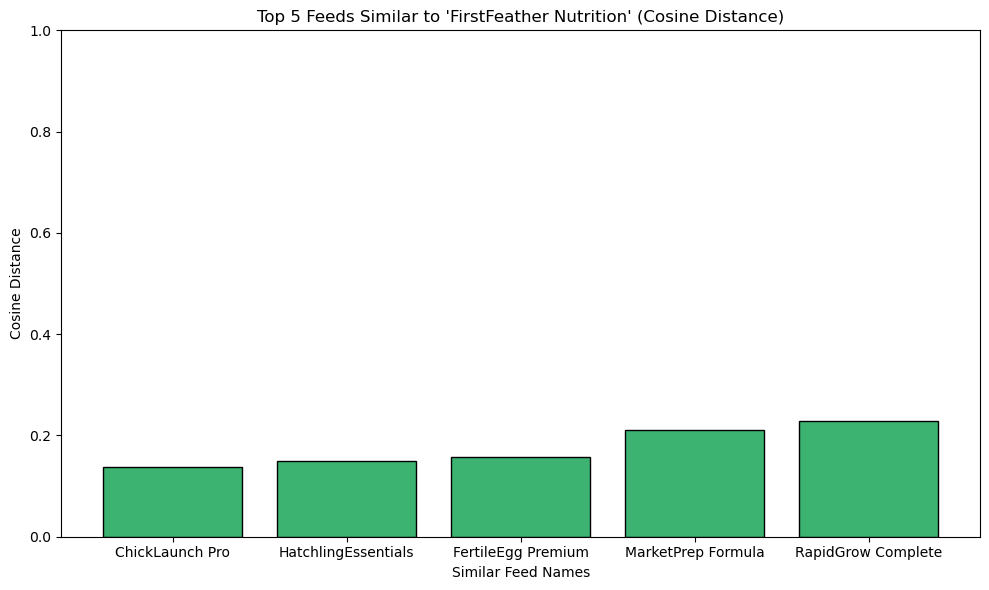

In [22]:
# Visualization of the distances

# Define function to get feed names and distances
def get_top_similar_feeds(feed_id, distance_matrix, feed_names, top_n=5):
    feed_idx = feed_id - 1  # Adjust for 0-indexing
    distances = distance_matrix[feed_idx]
    sorted_indices = np.argsort(distances)
    top_indices = sorted_indices[sorted_indices != feed_idx][:top_n]
    
    similar_names = feed_names.iloc[top_indices].values
    similar_distances = distances[top_indices]
    
    return similar_names, similar_distances

feed_id = 10
top_names, top_distances = get_top_similar_feeds(
    feed_id=feed_id,
    distance_matrix=cosine_dist_matrix,
    feed_names=df_chickwts['feed_name'],
    top_n=5
)

# Get the feed name for the selected ID
feed_name_10 = df_chickwts['feed_name'].iloc[feed_id - 1]

plt.figure(figsize=(10, 6))
plt.bar(top_names, top_distances, color='mediumseagreen', edgecolor='black')
plt.title(f"Top 5 Feeds Similar to '{feed_name_10}' (Cosine Distance)")
plt.xlabel("Similar Feed Names")
plt.ylabel("Cosine Distance")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [23]:
# Table with the top_5 most similar feeds presented in the chart above
top_indices = df_chickwts[df_chickwts['feed_name'].isin(top_names)].index.tolist()
reference_index = feed_id - 1
all_indices = [reference_index] + top_indices

# Filter the desired columns
# University of Georgia https://extension.uga.edu/publications/detail.html?number=C954&title=nutrition-for-the-backyard-flock&utm_source
selected_columns = ['feed_name', 'proteinContent', 'metabolizableEnergy', 'calciumContent', 'price']
comparison_df = df_chickwts.loc[all_indices, selected_columns].copy()

# Add cosine distance for top feeds (reference = 0.00000)
comparison_df['cosine_distance'] = [0.0] + list(top_distances)

# Set index to feed name for clean display
comparison_df = comparison_df.set_index("feed_name")
comparison_df

,proteinContent,metabolizableEnergy,calciumContent,price,cosine_distance
feed_name,,,,,
FirstFeather Nutrition,23.1,3082,0.77,1.82,0.000000
HatchlingEssentials,22.6,3165,0.84,1.80,0.137420
ChickLaunch Pro,22.6,3147,0.72,1.83,0.149508
RapidGrow Complete,21.3,3095,0.70,1.80,0.157799
MarketPrep Formula,23.4,3100,1.04,1.80,0.211639
FertileEgg Premium,22.0,3059,0.90,1.75,0.229200


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Conclusions**

Based on the cosine similarity matrix computed after PCA transformation, we identify the most similar feed types by comparing their multidimensional performance profiles. For each feed, the system finds the closest matches—those with the highest cosine similarity scores (or lowest cosine distances)—and recommends them as alternatives. This enables the agricultural supplier to suggest comparable feeds backed by empirical feature patterns.

This project successfully developed a recommendation system for agricultural feed products using the chickwts dataset. The system can suggest top alternative feeds for any given product — providing evidence-based recommendations that are grounded in actual performance data.

Cosine similarity focuses on pattern alignment rather than magnitude, making it ideal for recommending feed products that behave similarly across features, even if their overall values differ. This aligns with the business objective of recommending substitutes based on comparable performance behavior. Other distance metrics could be explored in the future (Euclidean and Manhattan)

Impact

- Reliable Substitutes: The system helps the supplier recommend comparable feed types when a preferred product is unavailable or too expensive — improving inventory flexibility and customer satisfaction.

- Data-Driven Decisions: Recommendations are based on quantified similarity across multiple performance metrics, not guesswork — enhancing the credibility of sales guidance and marketing claims.

- Scalability: Once implemented, the model can instantly analyze and compare hundreds or thousands of feed products, making it a valuable tool for both internal use and customer-facing applications.

- Strategic Promotion: Underutilized or new feed products with proven performance can be recommended alongside more popular options, creating opportunities to grow sales and diversify the offering.

Other cases

The recommendation system, based on cosine similarity after PCA transformation, consistently delivers meaningful suggestions across different feed profiles. For example, Feed ID 10 ("FirstFeather Nutrition") yields recommendations that are not only nutritionally aligned (e.g., similar protein and calcium levels) but also competitively priced, showing the model captures functional similarity patterns effectively. To ensure robustness, we tested additional feeds — Feed ID 50 ("MeatMax Complete") and Feed ID 99 ("ClutchPower Premium") — which represent different nutritional targets and price points. In both cases, the model returned relevant alternatives with comparable macronutrient compositions and energy profiles, demonstrating its ability to generalize across varying business scenarios. The visual and tabular outputs for these feeds are included in the appendix to provide transparent evidence of model consistency and reliability

# Appendix

### Example #2 ID = 50

In [24]:
# Example for ID = 10 Top 5 products similar to it
similar_feeds_cosine = find_similar_feeds(50, cosine_dist_matrix, df_chickwts['feed_name'])
similar_feeds_cosine

['FecundityBoost Complete',
 'ChickBoost Complete',
 'FertileLayer Complete',
 'LayerLuxe Complete',
 'MeatMaker Premium']

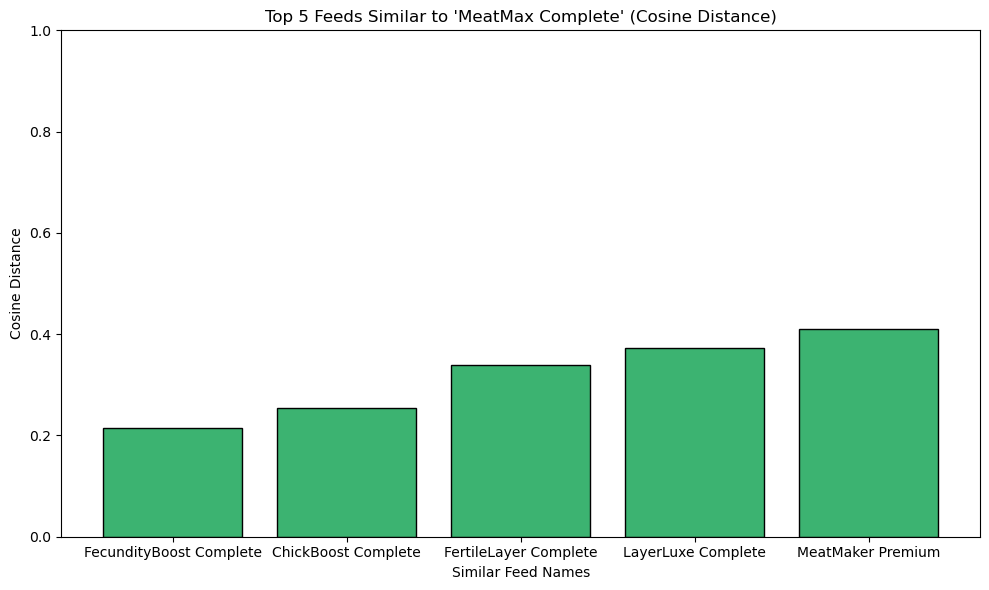

In [25]:
# Visualization of the distances

# Define function to get feed names and distances
def get_top_similar_feeds(feed_id, distance_matrix, feed_names, top_n=5):
    feed_idx = feed_id - 1  # Adjust for 0-indexing
    distances = distance_matrix[feed_idx]
    sorted_indices = np.argsort(distances)
    top_indices = sorted_indices[sorted_indices != feed_idx][:top_n]
    
    similar_names = feed_names.iloc[top_indices].values
    similar_distances = distances[top_indices]
    
    return similar_names, similar_distances

feed_id = 50
top_names, top_distances = get_top_similar_feeds(
    feed_id=feed_id,
    distance_matrix=cosine_dist_matrix,
    feed_names=df_chickwts['feed_name'],
    top_n=5
)

# Get the feed name for the selected ID
feed_name_10 = df_chickwts['feed_name'].iloc[feed_id - 1]

plt.figure(figsize=(10, 6))
plt.bar(top_names, top_distances, color='mediumseagreen', edgecolor='black')
plt.title(f"Top 5 Feeds Similar to '{feed_name_10}' (Cosine Distance)")
plt.xlabel("Similar Feed Names")
plt.ylabel("Cosine Distance")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [26]:
# Table with the top_5 most similar feeds presented in the chart above
top_indices = df_chickwts[df_chickwts['feed_name'].isin(top_names)].index.tolist()
reference_index = feed_id - 1
all_indices = [reference_index] + top_indices

# Filter the desired columns
# University of Georgia https://extension.uga.edu/publications/detail.html?number=C954&title=nutrition-for-the-backyard-flock&utm_source
selected_columns = ['feed_name', 'proteinContent', 'metabolizableEnergy', 'calciumContent', 'price']
comparison_df = df_chickwts.loc[all_indices, selected_columns].copy()

# Add cosine distance for top feeds (reference = 0.00000)
comparison_df['cosine_distance'] = [0.0] + list(top_distances)

# Set index to feed name for clean display
comparison_df = comparison_df.set_index("feed_name")
comparison_df

,proteinContent,metabolizableEnergy,calciumContent,price,cosine_distance
feed_name,,,,,
MeatMax Complete,19.2,2876,1.09,1.63,0.000000
ChickBoost Complete,18.5,3001,1.00,1.66,0.213962
LayerLuxe Complete,17.6,2799,3.03,1.58,0.253394
FertileLayer Complete,19.5,2842,0.84,1.61,0.339260
MeatMaker Premium,20.7,2875,0.81,1.71,0.372219
FecundityBoost Complete,17.7,2789,0.73,1.56,0.410706


### Example #3 ID = 99

In [27]:
# Example for ID = 10 Top 5 products similar to it
similar_feeds_cosine = find_similar_feeds(99, cosine_dist_matrix, df_chickwts['feed_name'])
similar_feeds_cosine

['FertilityPlus Complete',
 'MarketReady Formula',
 'ClutchBoost Supreme',
 'PeepStart Max',
 'FertileSupport Enhanced']

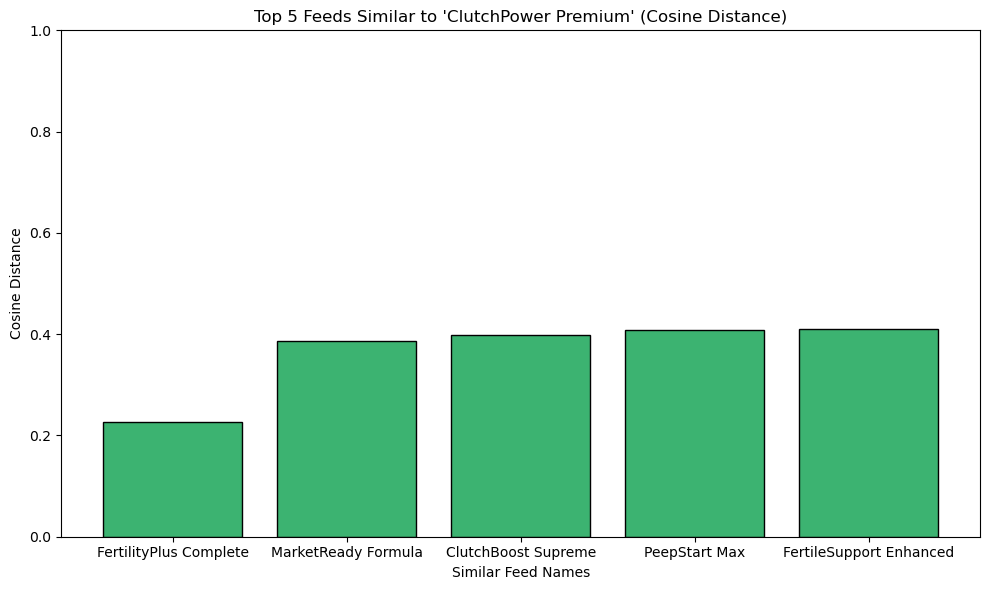

In [28]:
# Visualization of the distances

# Define function to get feed names and distances
def get_top_similar_feeds(feed_id, distance_matrix, feed_names, top_n=5):
    feed_idx = feed_id - 1  # Adjust for 0-indexing
    distances = distance_matrix[feed_idx]
    sorted_indices = np.argsort(distances)
    top_indices = sorted_indices[sorted_indices != feed_idx][:top_n]
    
    similar_names = feed_names.iloc[top_indices].values
    similar_distances = distances[top_indices]
    
    return similar_names, similar_distances

feed_id = 99
top_names, top_distances = get_top_similar_feeds(
    feed_id=feed_id,
    distance_matrix=cosine_dist_matrix,
    feed_names=df_chickwts['feed_name'],
    top_n=5
)

# Get the feed name for the selected ID
feed_name_10 = df_chickwts['feed_name'].iloc[feed_id - 1]

plt.figure(figsize=(10, 6))
plt.bar(top_names, top_distances, color='mediumseagreen', edgecolor='black')
plt.title(f"Top 5 Feeds Similar to '{feed_name_10}' (Cosine Distance)")
plt.xlabel("Similar Feed Names")
plt.ylabel("Cosine Distance")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [29]:
# Table with the top_5 most similar feeds presented in the chart above
top_indices = df_chickwts[df_chickwts['feed_name'].isin(top_names)].index.tolist()
reference_index = feed_id - 1
all_indices = [reference_index] + top_indices

# Filter the desired columns
# University of Georgia https://extension.uga.edu/publications/detail.html?number=C954&title=nutrition-for-the-backyard-flock&utm_source
selected_columns = ['feed_name', 'proteinContent', 'metabolizableEnergy', 'calciumContent', 'price']
comparison_df = df_chickwts.loc[all_indices, selected_columns].copy()

# Add cosine distance for top feeds (reference = 0.00000)
comparison_df['cosine_distance'] = [0.0] + list(top_distances)

# Set index to feed name for clean display
comparison_df = comparison_df.set_index("feed_name")
comparison_df

,proteinContent,metabolizableEnergy,calciumContent,price,cosine_distance
feed_name,,,,,
ClutchPower Premium,17.4,2885,0.95,1.65,0.000000
PeepStart Max,16.5,2789,0.73,1.60,0.226556
MarketReady Formula,16.0,3042,0.67,1.66,0.387041
FertilityPlus Complete,18.8,2883,1.11,1.62,0.398725
ClutchBoost Supreme,18.4,2977,0.89,1.66,0.408215
FertileSupport Enhanced,16.4,3006,0.70,1.63,0.411048
